In [37]:
import control as ctr

In [38]:
from control.matlab import *

In [39]:
import numpy as np


In [40]:
A = np.array([[0,1],[2,-1]])
B = np.array([[1],[0]])
C = np.array ([1,0])
D = 0

In [41]:
# Create state space object
sys = ctr.ss(A,B,C,D)

In [42]:
# Check eigenvalues
E = np.linalg.eig(A)
E

(array([ 1., -2.]),
 array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

In [43]:
# Desired close loop eigenvalues
P = [-2, -1]

In [44]:
# Solve using pole placement
K = ctr.place(A, B ,P)

In [45]:
# Check for closed loop eigenvalues
Acl = A - B* K
Ecl = np.linalg.eig(Acl)
Efcl = E[1]

In [50]:
# Closed loop system
syscl = ctr.ss(Acl, B ,C ,D)

In [54]:
response = ctr.step_response(sys)

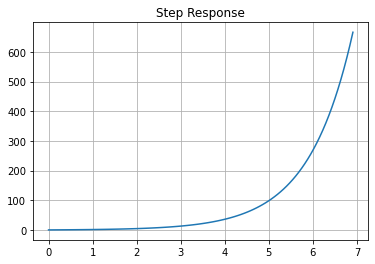

In [55]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(response.time, response.outputs)
plt.title('Step Response')
plt.grid()
plt.show()

In [56]:
response2 = ctr.step_response(syscl)

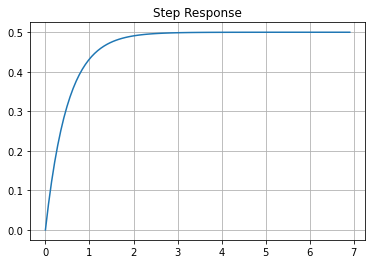

In [57]:
plt.figure(2)
plt.plot(response2.time, response2.outputs)
plt.title('Step Response')
plt.grid()
plt.show()

In [58]:
Kdc = ctr.dcgain(syscl)
Kr = 1/Kdc
Kr

2.0

In [61]:
# Create scaled input closed loop system
syscl_scaled = ctr.ss(Acl, B*Kr ,C ,D)

In [62]:
response3 = ctr.step_response(syscl_scaled)

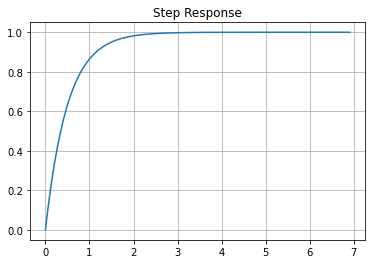

In [63]:
plt.figure(3)
plt.plot(response3.time, response3.outputs)
plt.title('Step Response')
plt.grid()
plt.show()